In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('data.csv')

In [4]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6655,6656,15703763,Sanderson,554,France,Male,44,7,85304.27,1,1,1,58076.52,0
7452,7453,15636562,Muravyova,573,Spain,Male,44,8,0.00,2,0,0,62424.46,0
5364,5365,15704144,Mazzanti,812,Germany,Male,33,2,127154.14,2,0,1,105383.49,0
2665,2666,15635660,Rossi,612,Germany,Male,30,9,142910.15,1,1,0,105890.55,1
4120,4121,15610105,Shen,666,Germany,Female,21,1,121827.43,2,1,1,99818.31,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
print(f"Original dataset shape: {df.shape}")
print("Original columns:", df.columns.tolist())

print("\n")
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print("Dropped 'RowNumber', 'CustomerId', 'Surname' columns.")
print("\n")

print(f"Cleaned dataset shape: {df.shape}")
print("Cleaned columns:", df.columns.tolist())

Original dataset shape: (10000, 14)
Original columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


Dropped 'RowNumber', 'CustomerId', 'Surname' columns.


Cleaned dataset shape: (10000, 11)
Cleaned columns: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [8]:
print(df['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


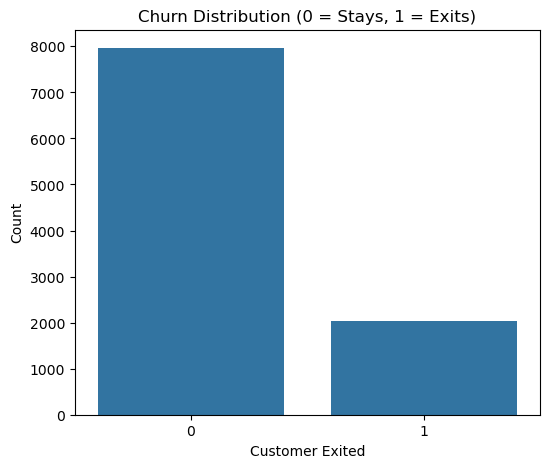

In [9]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution (0 = Stays, 1 = Exits)')
plt.xlabel('Customer Exited')
plt.ylabel('Count')
plt.show()

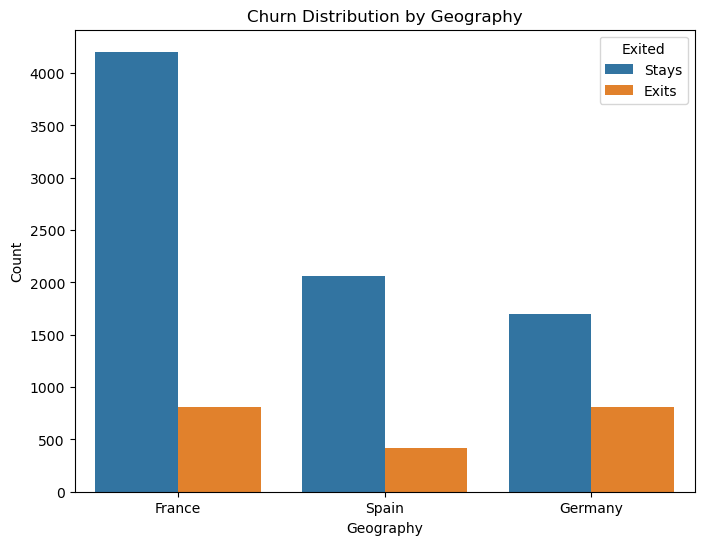

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stays', 'Exits'])
plt.show()

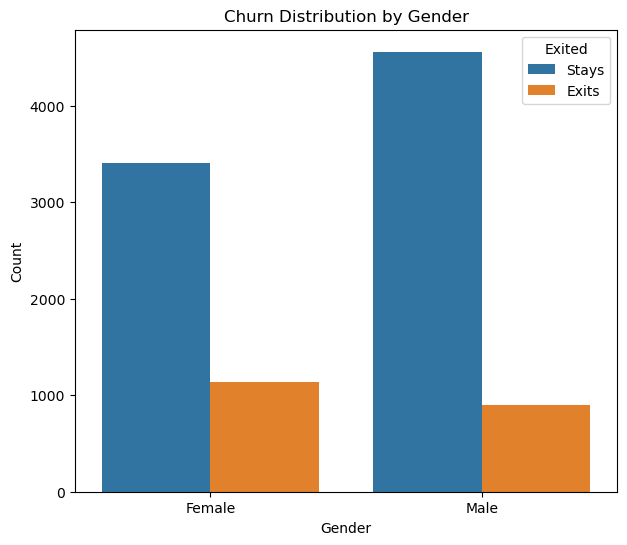

In [11]:
plt.figure(figsize=(7, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Stays', 'Exits'])
plt.show()

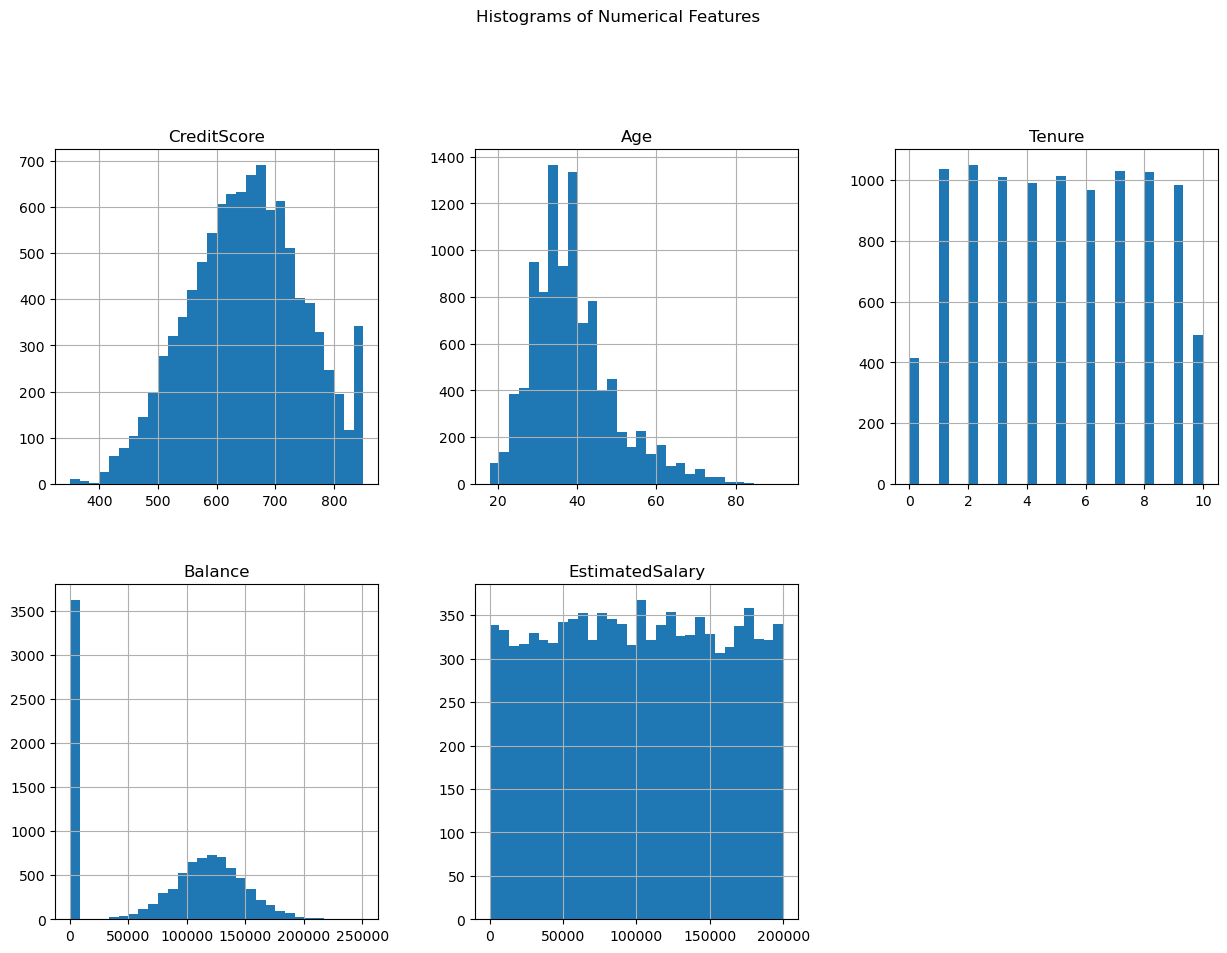

In [12]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()



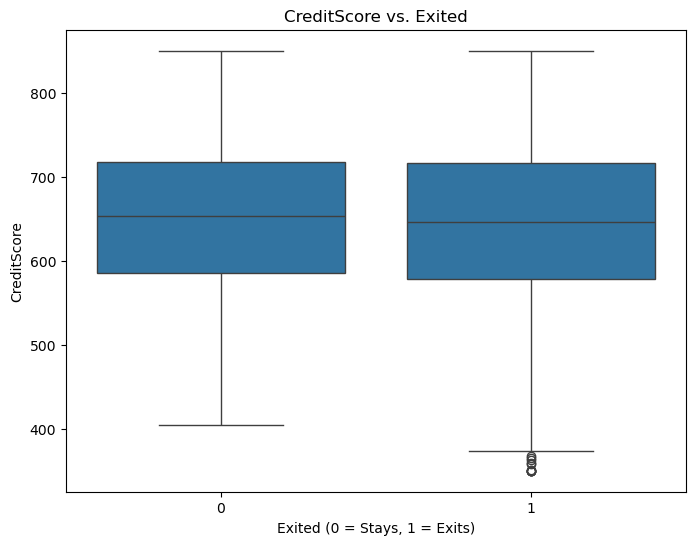

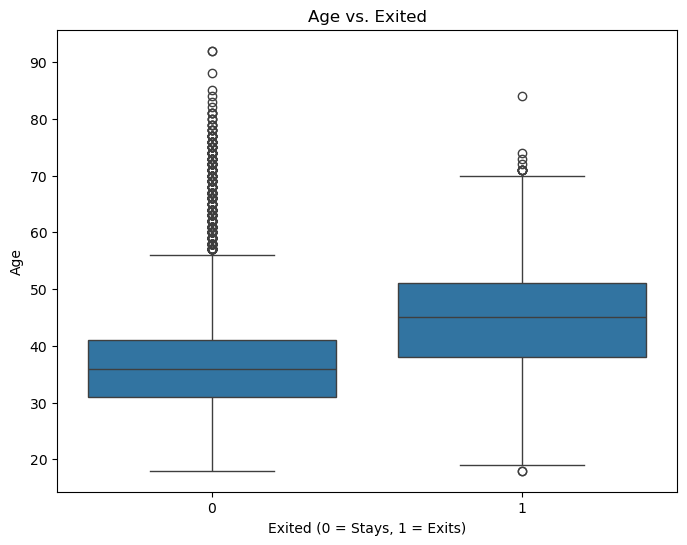

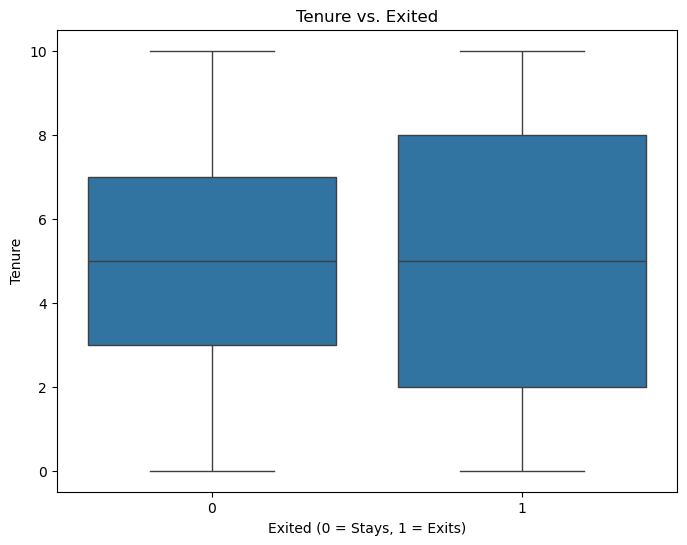

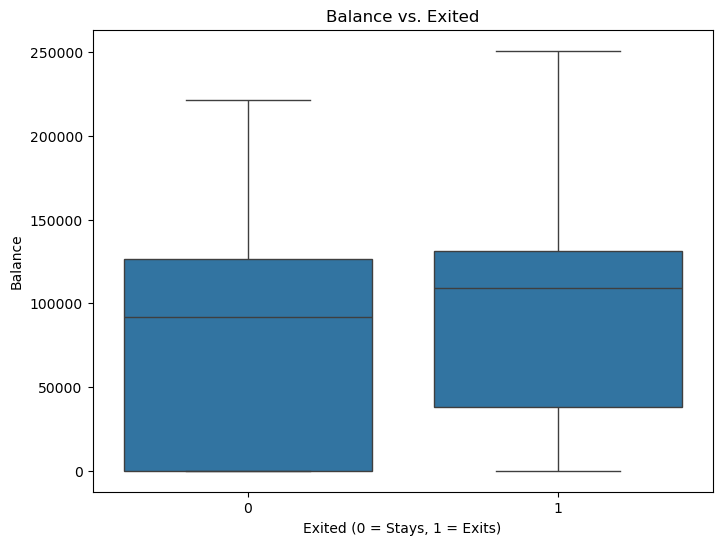

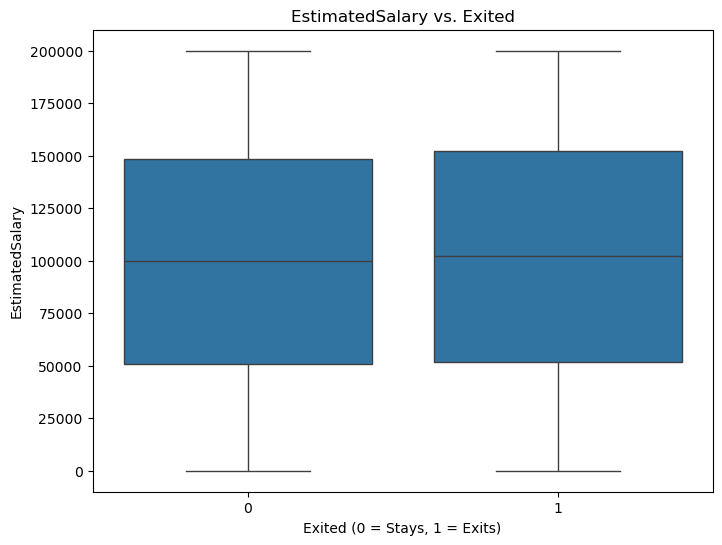

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs. Exited')
    plt.xlabel('Exited (0 = Stays, 1 = Exits)')
    plt.ylabel(col)
    plt.show()

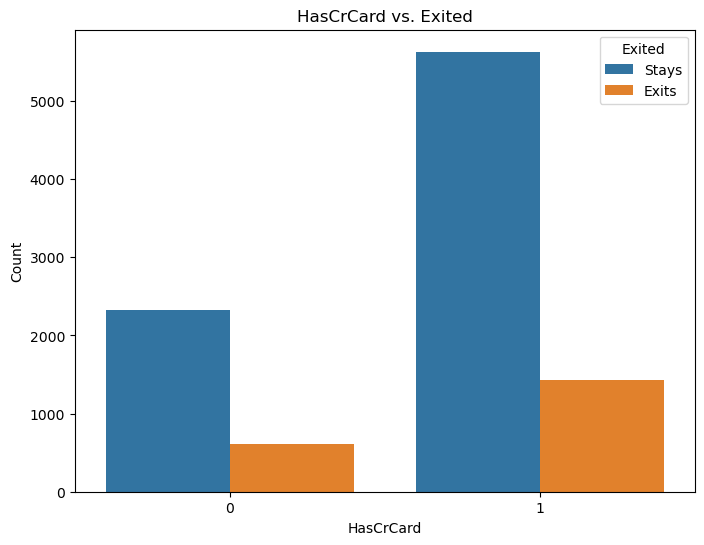

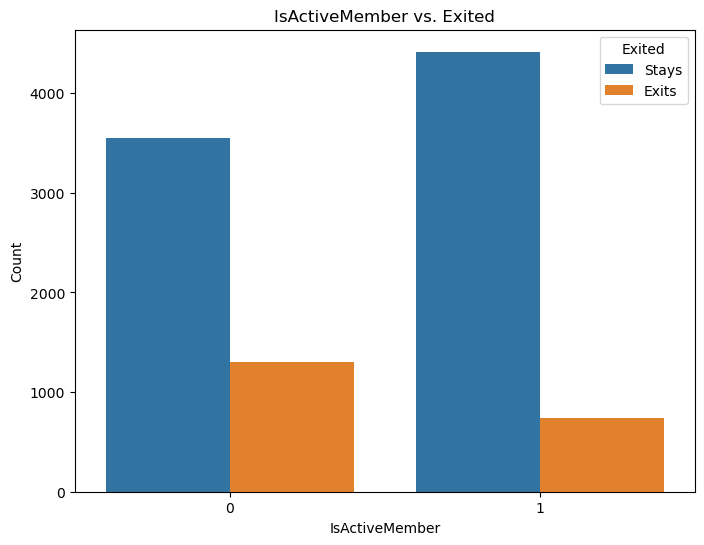

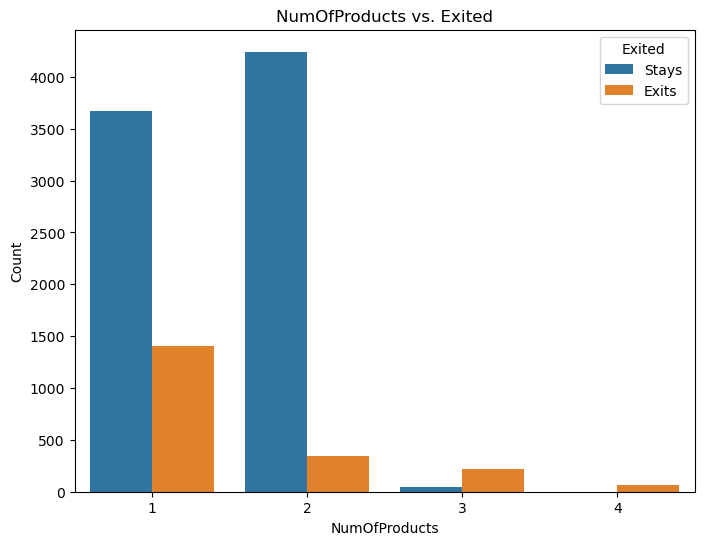

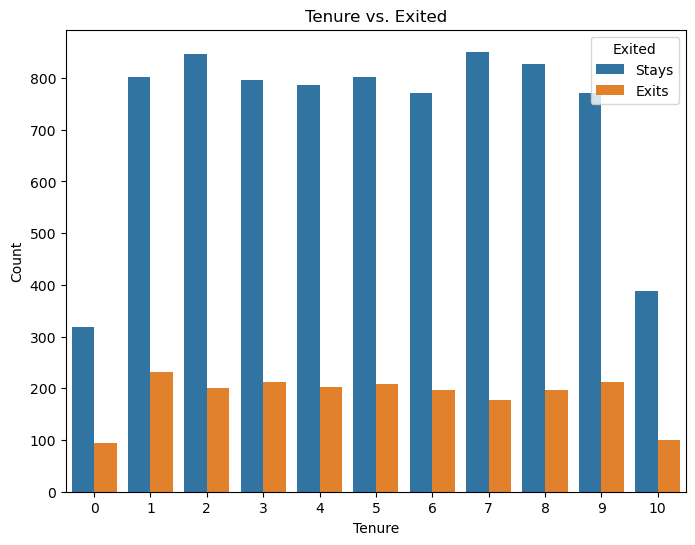

In [14]:
categorical_cols = ['HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'{col} vs. Exited')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Exited', labels=['Stays', 'Exits'])
    plt.show()

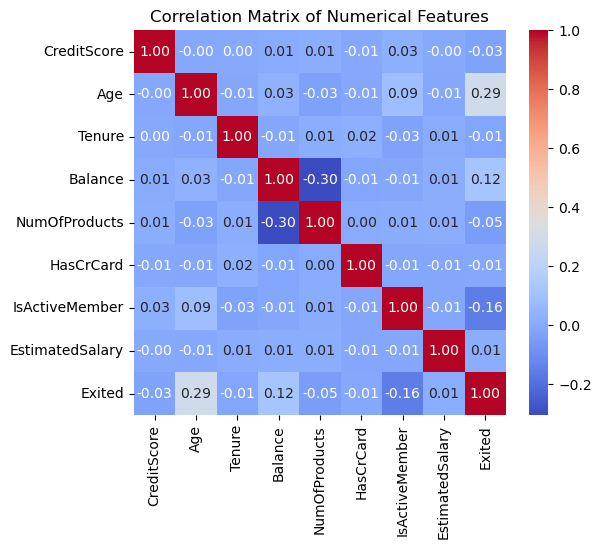

In [15]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(6,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler


df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

print(" 2. Categorical Features Encoded ")
print("Columns after one-hot encoding:")
print(df.columns.tolist())
print("\nData types after encoding:")
print(df.info())
print("\nFirst 5 rows after encoding:")
print(df.head())

 2. Categorical Features Encoded 
Columns after one-hot encoding:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']

Data types after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool  

In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited']

print(" 3. Features and Target Separated ")
print(f"Shape of Features (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")

 3. Features and Target Separated 
Shape of Features (X): (10000, 11)
Shape of Target (y): (10000,)


In [18]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


scaler = StandardScaler()


X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(" 4. Numerical Features Scaled ")
print("First 5 rows of scaled features (X):")
print(X.head())

 4. Numerical Features Scaled 
First 5 rows of scaled features (X):
   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583          1   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583          0   
2    -1.536794  0.293517  1.032908  1.333053       2.527057          1   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737          0   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583          1   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0               1         0.021886              False            False   
1               1         0.216534              False             True   
2               0         0.240687              False            False   
3               0        -0.108918              False            False   
4               1        -0.365276              False             True   

   Gender_Male  
0        False  
1       

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(" 2. Data Split into Training and Testing Sets ")
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

 2. Data Split into Training and Testing Sets 
Training Features Shape: (7000, 11)
Testing Features Shape: (3000, 11)
Training Target Shape: (7000,)
Testing Target Shape: (3000,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

print(" 3a. Training Logistic Regression Model ")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
print("Logistic Regression Model Trained Successfully.")

# b) Random Forest
print(" 3b. Training Random Forest Model ")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Model Trained Successfully.")

print("\nTraining XGBoost Model")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Model Trained Successfully.")

 3a. Training Logistic Regression Model 
Logistic Regression Model Trained Successfully.
 3b. Training Random Forest Model 
Random Forest Model Trained Successfully.

Training XGBoost Model
XGBoost Model Trained Successfully.


c:\Users\malla\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:24:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


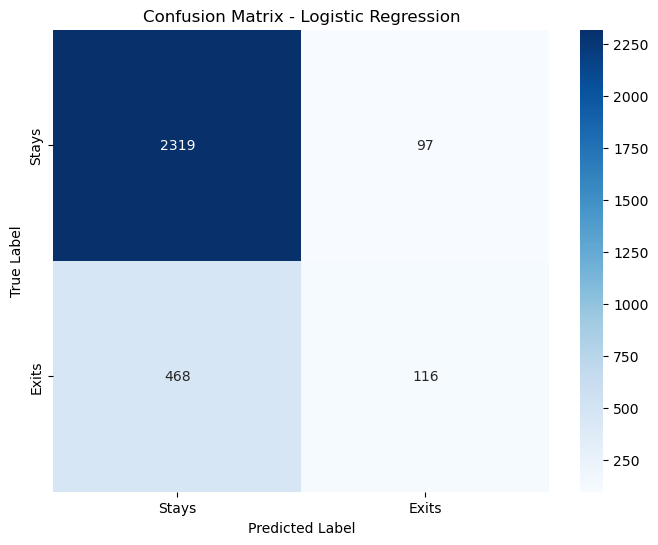

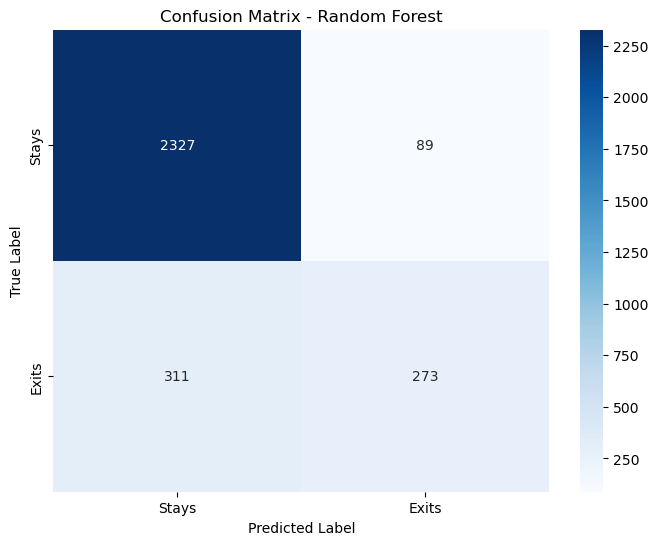

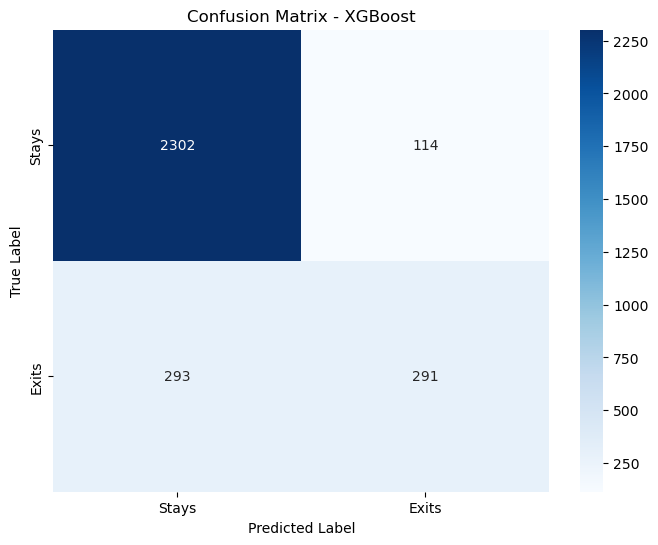

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, auc, precision_recall_curve, average_precision_score,classification_report
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)


y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


cm1 = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stays', 'Exits'], yticklabels=['Stays', 'Exits'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cm2 = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stays', 'Exits'], yticklabels=['Stays', 'Exits'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

cm3 = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stays', 'Exits'], yticklabels=['Stays', 'Exits'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


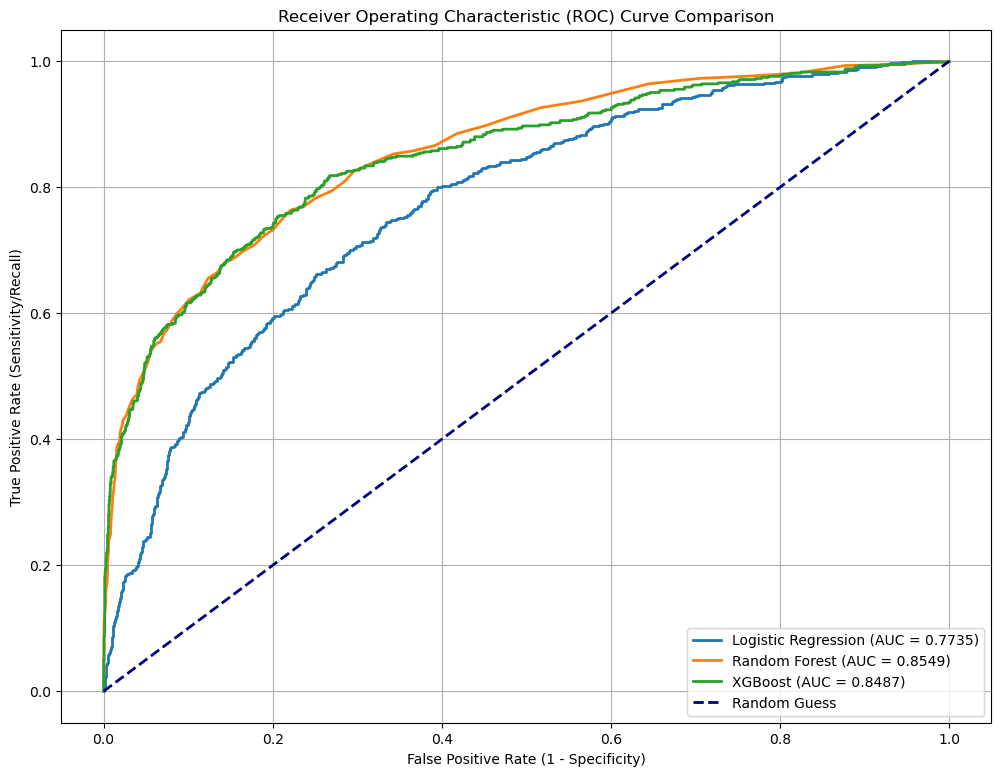

In [36]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)


fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(12, 9))

plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')


plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


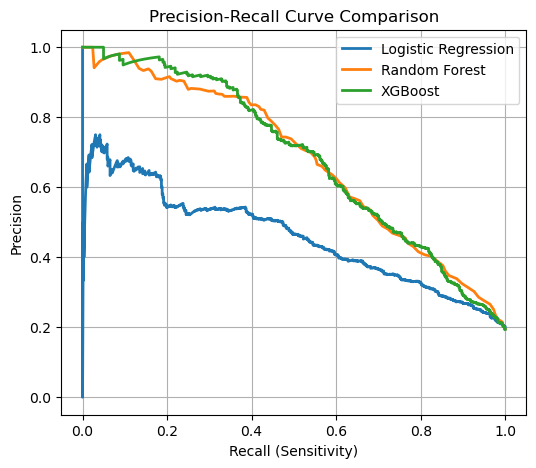

In [37]:

y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]


# Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)

# Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

# XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_xgb)


plt.figure(figsize=(6,5))

plt.plot(recall_lr, precision_lr, lw=2, label='Logistic Regression')
plt.plot(recall_rf, precision_rf, lw=2, label='Random Forest')
plt.plot(recall_xgb, precision_xgb, lw=2, label='XGBoost')

# Add labels, title, and legend
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="best")
plt.grid(True)
plt.show()


Top 5 Most Important Features:
             Feature  Importance
4      NumOfProducts    0.343166
6     IsActiveMember    0.179720
1                Age    0.111866
8  Geography_Germany    0.090987
3            Balance    0.055694


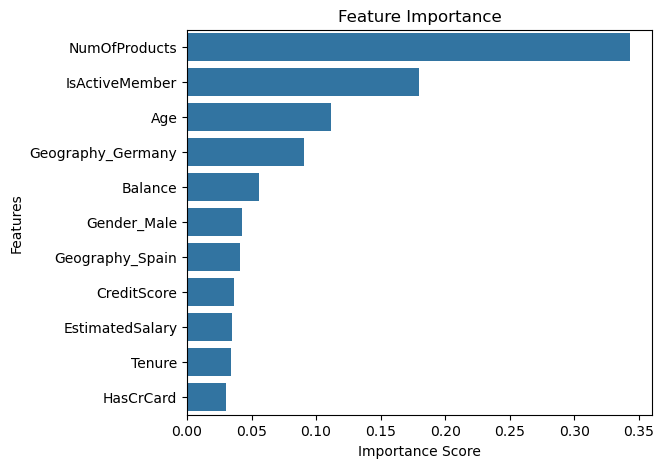

In [38]:
importances = xgb_model.feature_importances_
feature_names = X.columns


feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 5 Most Important Features:")
print(feature_importance_df.head())

# Plot the feature importances
plt.figure(figsize=(6,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [39]:
import pickle
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)